<a href="https://colab.research.google.com/github/sumersb/Dog_Classification/blob/main/Dog_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dog Breed MultiClassification

This notebook uses TensorFlow and an existing multiclassification model to predict dog breeds from photos of dogs

1. Why?

As someone who volunteers at an animal shelter one of the most common questions I get is what the breed of the dog is ? This is important because it can be very indicative of the dogs future characteristics and what the dog could be like. I also have adopted 2 dogs this past year, so working on something like this would allow me to focus on something I love.


2. Data

Data is sourced from Kaggle's dog breed identification competition that was hosted 6 years ago. For the future I will look into imagenet for more data if needed.

https://www.kaggle.com/competitions/dog-breed-identification/data


3. Goal

Our goal is similar to the rules of the competition where we want to get a spectrum of numbers 0-1 for each dog breed, with the highest being the predicted breed for the dog

4. Features

* The reason tensor flow is being used is because the data is unstructured and consists of images.
* The total amount of labeled images from the dataset is 10222

In [ ]:
# We are importing tensorflow to perform all the machine learning
import tensorflow as tf
# tensorflow_hub is a place where a bunch of existing models already exist
import tensorflow_hub as hub

#Just checking if we are using GPU
print(tf.config.list_physical_devices())
print ("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU available


 ## Convert our data into Tensors
 We must convert images into numerical format

In [ ]:
# Let's import our data from the CSV

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

labeled_CSV = pd.read_csv("/content/drive/MyDrive/DogClassification/labels.csv")

In [ ]:
# Brief description of labels
labeled_CSV.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126

In [ ]:
# First 5 rows of labels
labeled_CSV.head(5)

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

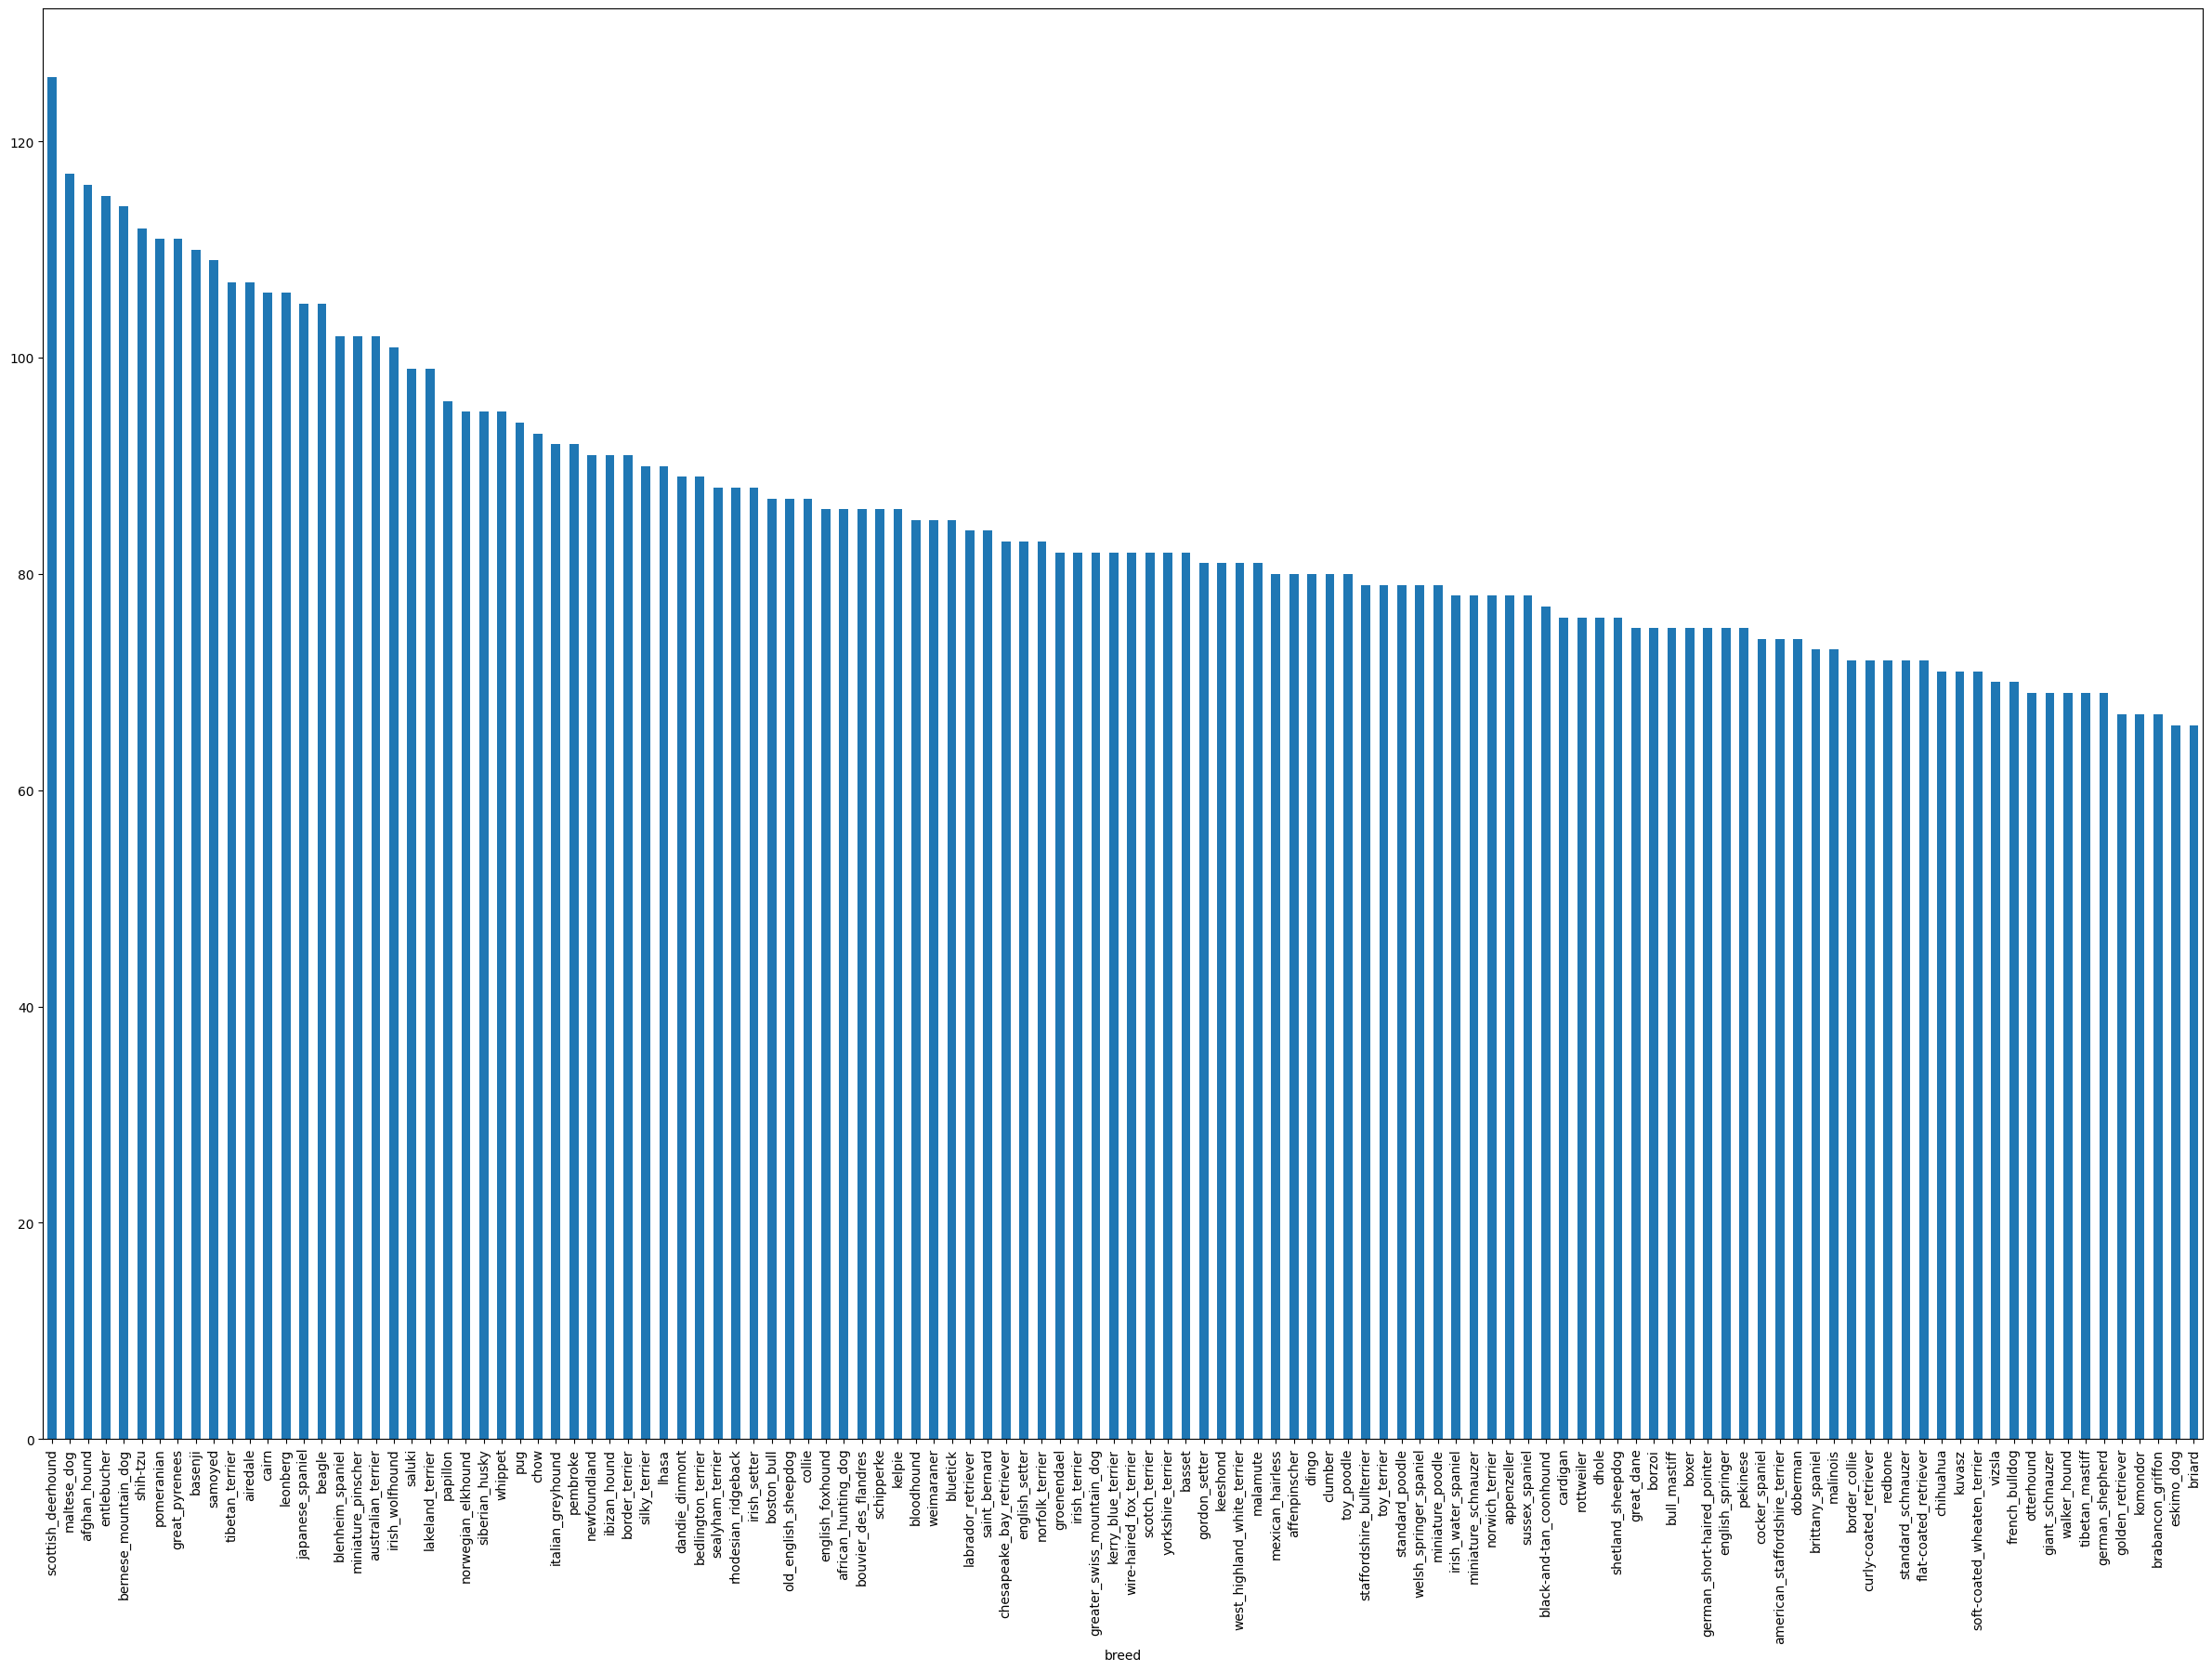

In [ ]:
labeled_CSV['breed'].value_counts().plot(kind = 'bar', figsize = (30,20));

Look at min and max frequency of breeds

In [ ]:
print("Max frequency : ",max(labeled_CSV['breed'].value_counts()))
print("Min frequency : ",min(labeled_CSV['breed'].value_counts()))

Max frequency :  126
Min frequency :  66


## Let's gather all image addresses
This is done by iterating through the id and concatenating with the file directory

In [ ]:
# This gives a list of the address of all the X (features) data
dog_files = []
for id in labeled_CSV.id:
  dog_files.append("/content/drive/MyDrive/DogClassification/train/"+id+".jpg")
dog_files[:5]

['/content/drive/MyDrive/DogClassification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/DogClassification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/DogClassification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/DogClassification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/DogClassification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [ ]:
# Convert labeled_CSV to numpy array
labels = labeled_CSV['breed'].to_numpy()
labels.shape

(10222,)

### Let's take a look at the output range

In [ ]:
breed_types = np.unique(labels)
breed_types

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

### We need to convert the strings to numeric

We can do this by looking through all the resulting data and indicating whether the breed is a match by indicating a 1 for that breed and a 0 for the other breeds

In [ ]:
y = np.array([label == breed_types for label in labels], dtype=int)
print(y[:3])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]


In [ ]:
X = dog_files

In [ ]:
IMG_COUNT = 1000

X_experiment = X[:IMG_COUNT]
y_experiment = y[:IMG_COUNT]

len(X_experiment), len(y_experiment)

(1000, 1000)

In [ ]:
# Split training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_experiment,
                                                    y_experiment,
                                                    test_size = 0.2,
                                                    random_state = 42)
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

## Converting Images into Tensor

One of the challenges with machine learning comes to convert images to tensors.

We have to setup image based on the model we will be using which is mobilenet_v2

https://www.kaggle.com/models/google/mobilenet-v2/frameworks/tensorFlow2

The requirements for the batch input shape is  [None, 128, 128, 3]

This means the batch size is flexible, the image has to be 128x128 pixels and have 3 color channels which is what we will accomplish in the following problem. It also states in the model's documentation that the images are expected to have a color value in the range of 0-1 so we must convert the image to such format

In [ ]:
# Setup image size based on existing model
def imageToTensor(file_path, img_size, rotate, invert):
  """
  Converts the image stored at the file path and converts
  into a tensor of size img_size x img_size
  """
  # Read file
  image = tf.io.read_file(file_path)
  # Decode as a jpeg with 3 color channels (RGB)
  image = tf.io.decode_jpeg(image, channels = 3)
  # Convert color values from normal (0-255) -> 0-1
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize all images to IMG_SIZE * IMG_SIZE
  image = tf.image.resize(image, size = [img_size, img_size])

  if rotate:
    tf.image.rot90(image, k = 2)

  if invert:
    image = 1 - image

  return image

## TensorFlow Data Format

Data needs to be converted to the form (tensor, label) for TensorFlow

In [ ]:
def tupleTensor(image_path, img_size, y_label,rotate, invert):
  """
  Takes image_path and converts to Tensor then return to (tensor,label) tuple
  """
  return imageToTensor(image_path, img_size, rotate, invert), y_label

## Batch Size Optimization

According to my research larger batch size can lead to overfitting while lower batch size can take longer training times but a good place to start is 25 or 32


In [ ]:
def create_data_batches(X, y, batch_size, img_size, valid_data = False, rotate = False, invert = False):
  # Convert the data (X,y) and put them into Tensor format
  data = tf.data.Dataset.from_tensor_slices((
      tf.constant(X),
      tf.constant(y),
  ))
  # Validation data should not be shuffled because it can introduce bias
  if not valid_data:
    data = data.shuffle(buffer_size=len(X))
  # Map the data into tuple format and then form batches with said data
  batch = data.map(lambda X, y: tupleTensor(X, img_size, y, rotate, invert)).batch(batch_size)

  return batch

In [ ]:
# Creating training and testing data
IMG_SIZE = 128
BATCH_SIZE = 32

train_data = create_data_batches(X_train, y_train, BATCH_SIZE, IMG_SIZE)
val_data = create_data_batches(X_test, y_test, BATCH_SIZE, IMG_SIZE, valid_data = True)

In [ ]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.int64, name=None)),
 (TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.int64, name=None)))

### Keras API

The next following bit takes advantage of Keras API Sequential model

Keras API Sequential model allows you to build layers on top of each other linearly

In [ ]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # Taken from the required input shape
OUTPUT_SHAPE = len(breed_types) # Taken from the number of unique breeds

MODEL_URL = "https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-128-classification/versions/2"

### Time to start building the model

This part was done a lot through the keras API with instructions on how to build a model

https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

Keras Sequential APi allows you to go layer by layer, So

In [ ]:
def keras_create_model(input = INPUT_SHAPE, output = OUTPUT_SHAPE, model = MODEL_URL):
  print("Building model with :",MODEL_URL)

  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL),
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation="softmax",
                            )
  ])

  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  model.build(INPUT_SHAPE)

  return model

In [ ]:
model = keras_create_model()
model.summary()

Building model with : https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-128-classification/versions/2
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              1692489   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 1812729 (6.92 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 1692489 (6.46 MB)
_________________________________________________________________


## Let's make some safeties

* Progress Tracker
* Early Stop when Lack of Progress

In [ ]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime
import os

def tensorboard_progress_logger():

  logdir = os.path.join("drive/MyDrive/DogClassification/logs")
  datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
stopper = tf.keras.callbacks.EarlyStopping(
    monitor = "val_accuracy",
    patience = 3
)

In [ ]:
# Model is allowed to look at the training data 100 times
REVISION_ATTEMPTS = 100

In [ ]:
# Build a function to train and return a trained model

def trainModel(train_date, validation_data):

  model = keras_create_model()

  model.summary()

  tensorboard = tensorboard_progress_logger()

  model.fit(x = train_data,
            epochs = REVISION_ATTEMPTS,
            validation_data = val_data,
            validation_freq = 1,
            callbacks=[tensorboard,stopper])
  return model

In [ ]:
# Saving model so we don't have to retrain a model every single time we run this project
def save_model(model, suffix = None):
  modeldir = os.path.join("drive/MyDrive/DogClassification/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  model_path = modeldir + "-" + suffix + ".h5"
  model.save(model_path)
  print("Model saved at :", model_path)
  return model_path

In [ ]:
# Loading the saved model from the saved path
def load_model(model_path):
  return tf.keras.models.load_model(model_path,
                                    custom_objects = {"KerasLayer":hub.KerasLayer}) # Have to specify that one of the layers is from hub.Keraslayer

In [ ]:
model = trainModel(train_data, val_data)
save_model(model, "mobile_net_v2")

Building model with : https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-128-classification/versions/2
Epoch 1/100
25/25 [==============================] - 6s 83ms/step - loss: 5.6271 - accuracy: 0.0425 - val_loss: 4.7633 - val_accuracy: 0.0700
Epoch 2/100
25/25 [==============================] - 2s 64ms/step - loss: 2.4102 - accuracy: 0.4338 - val_loss: 3.7950 - val_accuracy: 0.1800
Epoch 3/100
25/25 [==============================] - 2s 61ms/step - loss: 1.0918 - accuracy: 0.7812 - val_loss: 3.5063 - val_accuracy: 0.2300
Epoch 4/100
25/25 [==============================] - 2s 65ms/step - loss: 0.5063 - accuracy: 0.9425 - val_loss: 3.4939 - val_accuracy: 0.2450
Epoch 5/100
25/25 [==============================] - 2s 65ms/step - loss: 0.2643 - accuracy: 0.9937 - val_loss: 3.4980 - val_accuracy: 0.2550
Epoch 6/100
25/25 [==============================] - 2s 65ms/step - loss: 0.1646 - accuracy: 1.0000 - val_loss: 3.5218 - val_accuracy: 0.2450
Epoch 7/

'drive/MyDrive/DogClassification/models/20240416-180104-mobile_net_v2.h5'

## Attempt at another model
This time let's try using the efficientnet_v2 model as it is capable of taking in images of larger sizes which should hopefully
increase our ability to identify dog breeds.

"https://www.kaggle.com/models/google/efficientnet-v2/frameworks/TensorFlow2/variations/imagenet1k-b0-classification/versions/2"

[None, 224, 224, 3]

This image takes in a size of 224x224 pixels

In [ ]:
# Reassign IMG_SIZE to adjust for the different model
IMG_SIZE = 224

# Creating training and testing data
train_data = create_data_batches(X_train, y_train, BATCH_SIZE, IMG_SIZE)
val_data = create_data_batches(X_test, y_test, BATCH_SIZE, IMG_SIZE, valid_data = True)

train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.int64, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.int64, name=None)))

In [ ]:
# Adjust the previous values for model input shape and output and URL
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # Taken from the required input shape
OUTPUT_SHAPE = len(breed_types) # Taken from the number of unique breeds

MODEL_URL = "https://www.kaggle.com/models/google/efficientnet-v2/frameworks/TensorFlow2/variations/imagenet1k-b0-classification/versions/2"

In [ ]:
model = keras_create_model()
model.summary()

Building model with : https://www.kaggle.com/models/google/efficientnet-v2/frameworks/TensorFlow2/variations/imagenet1k-b0-classification/versions/2
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1000)              7200312   
                                                                 
 dense_3 (Dense)             (None, 120)               120120    
                                                                 
Total params: 7320432 (27.93 MB)
Trainable params: 120120 (469.22 KB)
Non-trainable params: 7200312 (27.47 MB)
_________________________________________________________________


In [ ]:
model = trainModel(train_data, val_data)
save_model(model, "efficientnet_v2")

Building model with : https://www.kaggle.com/models/google/efficientnet-v2/frameworks/TensorFlow2/variations/imagenet1k-b0-classification/versions/2
Epoch 1/100
25/25 [==============================] - 10s 104ms/step - loss: 4.6095 - accuracy: 0.0838 - val_loss: 3.4707 - val_accuracy: 0.2700
Epoch 2/100
25/25 [==============================] - 2s 65ms/step - loss: 1.8506 - accuracy: 0.6125 - val_loss: 2.3101 - val_accuracy: 0.4900
Epoch 3/100
25/25 [==============================] - 2s 66ms/step - loss: 0.7961 - accuracy: 0.8825 - val_loss: 1.8760 - val_accuracy: 0.5700
Epoch 4/100
25/25 [==============================] - 2s 66ms/step - loss: 0.3997 - accuracy: 0.9675 - val_loss: 1.7234 - val_accuracy: 0.6000
Epoch 5/100
25/25 [==============================] - 2s 65ms/step - loss: 0.2445 - accuracy: 0.9900 - val_loss: 1.6773 - val_accuracy: 0.5850
Epoch 6/100
25/25 [==============================] - 2s 69ms/step - loss: 0.1694 - accuracy: 0.9962 - val_loss: 1.6376 - val_accuracy: 0.59

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at : drive/MyDrive/DogClassification/models/20240416-180303-efficientnet_v2.h5


## Training new model  
Size : [None, 512, 512, 3]

"https://www.kaggle.com/models/google/efficientnet-v2/frameworks/TensorFlow2/variations/imagenet21k-ft1k-xl-feature-vector/versions/1"

In [ ]:
# Reassign IMG_SIZE to adjust for the different model
IMG_SIZE = 512

# Creating training and testing data
train_data = create_data_batches(X_train, y_train, BATCH_SIZE, IMG_SIZE)
val_data = create_data_batches(X_test, y_test, BATCH_SIZE, IMG_SIZE, valid_data = True)

train_data.element_spec, val_data.element_spec

# Adjust the previous values for model input shape and output and URL
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # Taken from the required input shape
OUTPUT_SHAPE = len(breed_types) # Taken from the number of unique breeds

MODEL_URL = "https://www.kaggle.com/models/google/efficientnet-v2/frameworks/TensorFlow2/variations/imagenet21k-ft1k-xl-feature-vector/versions/1"

In [ ]:
model = trainModel(train_data, val_data)
save_model(model, "EffNetXLBase")

Building model with : https://www.kaggle.com/models/google/efficientnet-v2/frameworks/TensorFlow2/variations/imagenet21k-ft1k-xl-feature-vector/versions/1
Epoch 1/100
25/25 [==============================] - 60s 1s/step - loss: 4.2000 - accuracy: 0.2225 - val_loss: 2.9865 - val_accuracy: 0.4900
Epoch 2/100
25/25 [==============================] - 23s 935ms/step - loss: 1.5253 - accuracy: 0.8562 - val_loss: 1.3530 - val_accuracy: 0.8000
Epoch 3/100
25/25 [==============================] - 23s 937ms/step - loss: 0.4771 - accuracy: 0.9600 - val_loss: 0.7561 - val_accuracy: 0.8500
Epoch 4/100
25/25 [==============================] - 23s 937ms/step - loss: 0.2131 - accuracy: 0.9875 - val_loss: 0.5448 - val_accuracy: 0.9000
Epoch 5/100
25/25 [==============================] - 23s 936ms/step - loss: 0.1306 - accuracy: 0.9950 - val_loss: 0.4567 - val_accuracy: 0.9100
Epoch 6/100
25/25 [==============================] - 23s 937ms/step - loss: 0.0940 - accuracy: 0.9987 - val_loss: 0.4075 - val_a

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at : drive/MyDrive/DogClassification/models/20240416-185235-EffNetXLBase.h5


'drive/MyDrive/DogClassification/models/20240416-185235-EffNetXLBase.h5'

## Training analysis

The model's performance can be measure by looking at the tensorboard logs. This is shown below.

In [ ]:
def combine_batches(batch1, batch2):
    # Concatenate the batches
    combined_batch = batch1.concatenate(batch2)
    return combined_batch

In [ ]:
# Reassign IMG_SIZE to adjust for the different model
IMG_SIZE = 512

# Creating training and testing data
train_data = create_data_batches(X_train, y_train, BATCH_SIZE, IMG_SIZE)
upside_down_train_data = create_data_batches(X_train, y_train, BATCH_SIZE, IMG_SIZE, rotate = True)
inverted_train_data = create_data_batches(X_train, y_train, BATCH_SIZE, IMG_SIZE, invert = True)
upside_down_inverted_train_data = create_data_batches(X_train, y_train, BATCH_SIZE, IMG_SIZE, rotate = True, invert = True)
val_data = create_data_batches(X_test, y_test, BATCH_SIZE, IMG_SIZE, valid_data = True)

train_and_upside_down_data = combine_batches(train_data, upside_down_train_data)
train_and_inverted_data = combine_batches(train_data, inverted_train_data)
train_and_upside_down_inverted_data = combine_batches(train_data, upside_down_inverted_train_data)
train_data.element_spec, val_data.element_spec

# Adjust the previous values for model input shape and output and URL
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # Taken from the required input shape
OUTPUT_SHAPE = len(breed_types) # Taken from the number of unique breeds

MODEL_URL = "https://www.kaggle.com/models/google/efficientnet-v2/frameworks/TensorFlow2/variations/imagenet21k-ft1k-xl-feature-vector/versions/1"


In [ ]:
model = trainModel(train_and_upside_down_data, val_data)

Building model with : https://www.kaggle.com/models/google/efficientnet-v2/frameworks/TensorFlow2/variations/imagenet21k-ft1k-xl-feature-vector/versions/1
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1280)              207615832 
                                                                 
 dense_3 (Dense)             (None, 120)               153720    
                                                                 
Total params: 207769552 (792.58 MB)
Trainable params: 153720 (600.47 KB)
Non-trainable params: 207615832 (791.99 MB)
_________________________________________________________________
Building model with : https://www.kaggle.com/models/google/efficientnet-v2/frameworks/TensorFlow2/variations/imagenet21k-ft1k-xl-feature-vector/versions/1
Epoch 1/100
25/25 [==============================] - 121s 3s/step - loss: 4.1008 - accura

In [ ]:
save_model(model, "model+upside_down")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at : drive/MyDrive/DogClassification/models/20240416-124539-model+upside_down.h5


'drive/MyDrive/DogClassification/models/20240416-124539-model+upside_down.h5'

In [ ]:

model2 = trainModel(train_and_inverted_data, val_data)

Building model with : https://www.kaggle.com/models/google/efficientnet-v2/frameworks/TensorFlow2/variations/imagenet21k-ft1k-xl-feature-vector/versions/1
Epoch 1/100
25/25 [==============================] - 156s 4s/step - loss: 4.1423 - accuracy: 0.2237 - val_loss: 2.9522 - val_accuracy: 0.5200
Epoch 2/100
25/25 [==============================] - 85s 3s/step - loss: 1.4800 - accuracy: 0.8487 - val_loss: 1.2646 - val_accuracy: 0.8450
Epoch 3/100
25/25 [==============================] - 86s 3s/step - loss: 0.4670 - accuracy: 0.9625 - val_loss: 0.7259 - val_accuracy: 0.8900
Epoch 4/100
25/25 [==============================] - 86s 3s/step - loss: 0.2120 - accuracy: 0.9900 - val_loss: 0.5158 - val_accuracy: 0.9250
Epoch 5/100
25/25 [==============================] - 86s 3s/step - loss: 0.1298 - accuracy: 0.9937 - val_loss: 0.4331 - val_accuracy: 0.9350
Epoch 6/100
25/25 [==============================] - 86s 3s/step - loss: 0.0915 - accuracy: 0.9975 - val_loss: 0.3961 - val_accuracy: 0.930

In [ ]:
save_model(model2, "model+inverted")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at : drive/MyDrive/DogClassification/models/20240416-132328-model+inverted.h5


'drive/MyDrive/DogClassification/models/20240416-132328-model+inverted.h5'

In [ ]:
model3 = trainModel(train_and_upside_down_invert  ed_data, val_data)

Building model with : https://www.kaggle.com/models/google/efficientnet-v2/frameworks/TensorFlow2/variations/imagenet21k-ft1k-xl-feature-vector/versions/1
Epoch 1/100
25/25 [==============================] - 119s 3s/step - loss: 4.2365 - accuracy: 0.1850 - val_loss: 2.9599 - val_accuracy: 0.5100
Epoch 2/100
25/25 [==============================] - 80s 3s/step - loss: 1.5400 - accuracy: 0.8487 - val_loss: 1.2907 - val_accuracy: 0.7950
Epoch 3/100
25/25 [==============================] - 85s 3s/step - loss: 0.4761 - accuracy: 0.9688 - val_loss: 0.7296 - val_accuracy: 0.8700
Epoch 4/100
25/25 [==============================] - 86s 3s/step - loss: 0.2137 - accuracy: 0.9900 - val_loss: 0.5305 - val_accuracy: 0.8750
Epoch 5/100
25/25 [==============================] - 86s 3s/step - loss: 0.1322 - accuracy: 0.9925 - val_loss: 0.4589 - val_accuracy: 0.8800
Epoch 6/100
25/25 [==============================] - 85s 3s/step - loss: 0.0943 - accuracy: 0.9975 - val_loss: 0.4137 - val_accuracy: 0.880

In [ ]:
save_model(model3, "model+upside_down+inverted")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at : drive/MyDrive/DogClassification/models/20240416-143115-model+upside_down+inverted.h5


'drive/MyDrive/DogClassification/models/20240416-143115-model+upside_down+inverted.h5'

In [ ]:
# Split training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)
len(X_train), len(y_train), len(X_test), len(y_test)


# Reassign IMG_SIZE to adjust for the different model
IMG_SIZE = 512

# Creating training and testing data
train_data = create_data_batches(X_train, y_train, BATCH_SIZE, IMG_SIZE)
inverted_train_data = create_data_batches(X_train, y_train, BATCH_SIZE, IMG_SIZE, invert = True)
val_data = create_data_batches(X_test, y_test, BATCH_SIZE, IMG_SIZE, valid_data = True)

train_and_inverted_data = combine_batches(train_data, inverted_train_data)
print(train_data.element_spec, val_data.element_spec)

# Adjust the previous values for model input shape and output and URL
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # Taken from the required input shape
OUTPUT_SHAPE = len(breed_types) # Taken from the number of unique breeds

MODEL_URL = "https://www.kaggle.com/models/google/efficientnet-v2/frameworks/TensorFlow2/variations/imagenet21k-ft1k-xl-feature-vector/versions/1"


(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.int64, name=None)) (TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.int64, name=None))


In [ ]:
final_model = trainModel(train_and_inverted_data, val_data)
save_model(final_model, "final_model")

Building model with : https://www.kaggle.com/models/google/efficientnet-v2/frameworks/TensorFlow2/variations/imagenet21k-ft1k-xl-feature-vector/versions/1
Epoch 1/100
256/256 [==============================] - 622s 2s/step - loss: 0.8722 - accuracy: 0.8525 - val_loss: 0.1639 - val_accuracy: 0.9594
Epoch 2/100
256/256 [==============================] - 236s 923ms/step - loss: 0.1149 - accuracy: 0.9725 - val_loss: 0.1403 - val_accuracy: 0.9560
Epoch 3/100
256/256 [==============================] - 236s 923ms/step - loss: 0.0703 - accuracy: 0.9823 - val_loss: 0.1158 - val_accuracy: 0.9638
Epoch 4/100
256/256 [==============================] - 236s 924ms/step - loss: 0.0471 - accuracy: 0.9892 - val_loss: 0.1112 - val_accuracy: 0.9658
Epoch 5/100
256/256 [==============================] - 236s 924ms/step - loss: 0.0323 - accuracy: 0.9941 - val_loss: 0.1087 - val_accuracy: 0.9648
Epoch 6/100
256/256 [==============================] - 236s 924ms/step - loss: 0.0247 - accuracy: 0.9962 - val_lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at : drive/MyDrive/DogClassification/models/20240416-193033-final_model.h5


'drive/MyDrive/DogClassification/models/20240416-193033-final_model.h5'

In [ ]:
final_model = load_model("drive/MyDrive/DogClassification/models/20240416-193033-final_model.h5")

In [ ]:
# Create predictions from the final model
val_preds = final_model.predict(val_data)

64/64 [==============================] - 157s 2s/step


In [ ]:
# Convert the array output to its string value by taking the index of the highest value
def featureToText(y_pred):
  return breed_types[np.argmax(y_pred)]

In [ ]:
val_features = []
val_labels = []
# Split the features and labels into 2 seperate arrays
for img, label in val_data.unbatch():
  val_features.append(img)
  val_labels.append(label)

In [ ]:
# Display Actual value, predicted value and image of dog
def predComparison(image, y, y_pred):
  plt.imshow(image.numpy())
  plt.axis('off')
  plt.show();
  print(f"Actual value : {featureToText(y)}")
  print(f"Predicted value : {featureToText(y_pred)}")

In [ ]:
import random

def viewValidation(size):
  if size > len(val_features):
    print("Sample size is greater than val_data size")
    return
  for i in random.sample(range(0,len(val_preds)),size):
    predComparison(val_features[i], val_labels[i], val_preds[i])

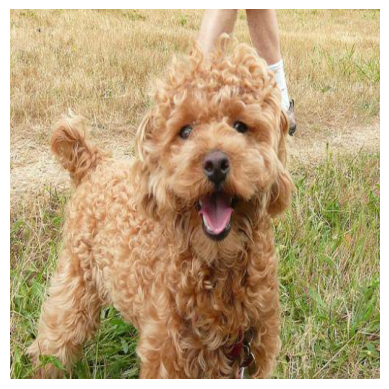

Actual value : toy_poodle
Predicted value : toy_poodle


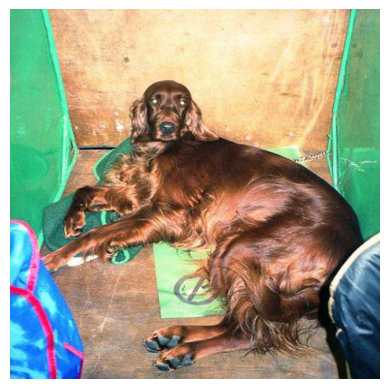

Actual value : irish_setter
Predicted value : irish_setter


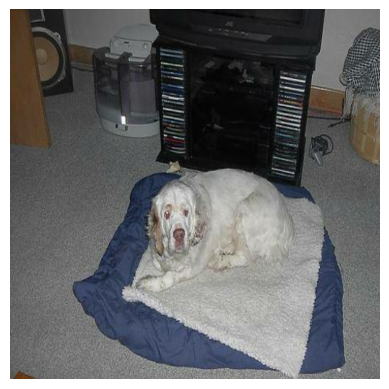

Actual value : clumber
Predicted value : clumber


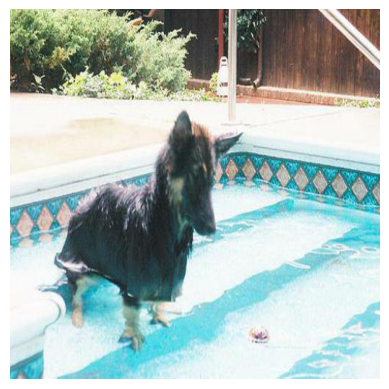

Actual value : german_shepherd
Predicted value : german_shepherd


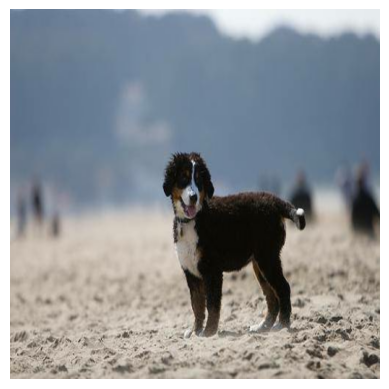

Actual value : bernese_mountain_dog
Predicted value : bernese_mountain_dog


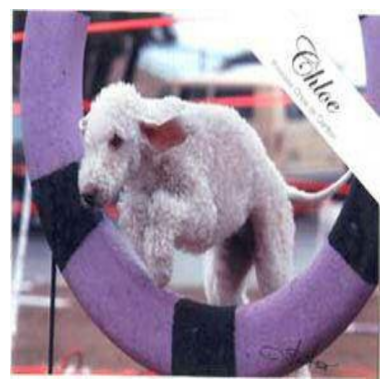

Actual value : bedlington_terrier
Predicted value : bedlington_terrier


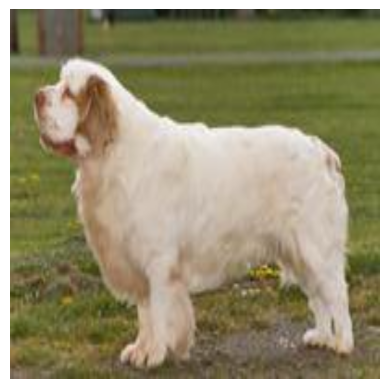

Actual value : clumber
Predicted value : clumber


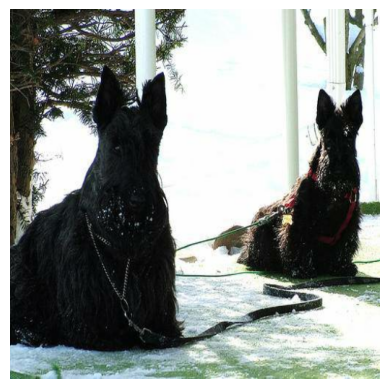

Actual value : scotch_terrier
Predicted value : scotch_terrier


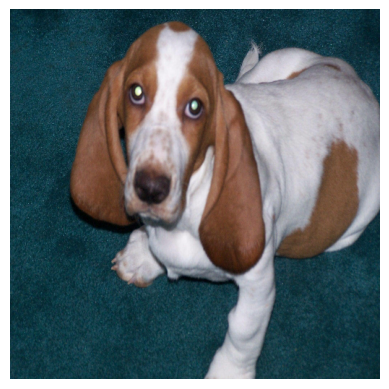

Actual value : basset
Predicted value : basset


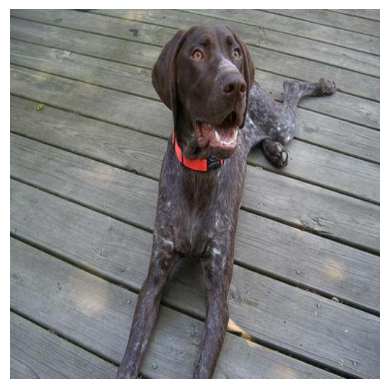

Actual value : german_short-haired_pointer
Predicted value : german_short-haired_pointer


In [ ]:
viewValidation(10)

In [ ]:
def viewIncorrect(image, y, y_pred, count):
  curr = 0
  for i in range(len(y)):
    if featureToText(y[i]) != featureToText(y_pred[i]):
      predComparison(image[i], y[i], y_pred[i])
      curr += 1
    if curr == count:
      break

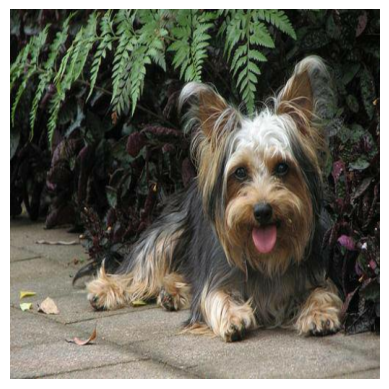

Actual value : australian_terrier
Predicted value : silky_terrier


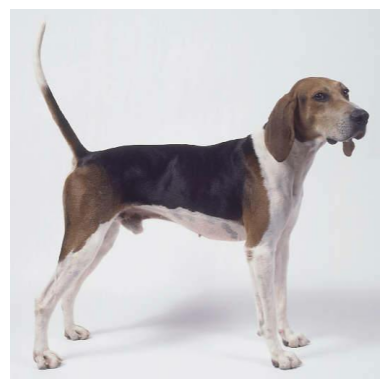

Actual value : english_foxhound
Predicted value : walker_hound


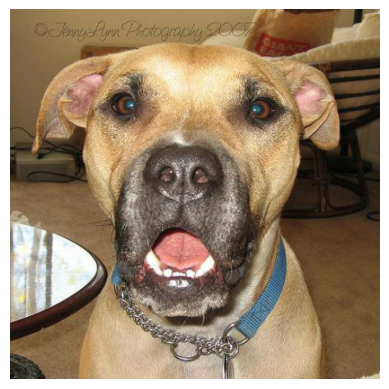

Actual value : bull_mastiff
Predicted value : american_staffordshire_terrier


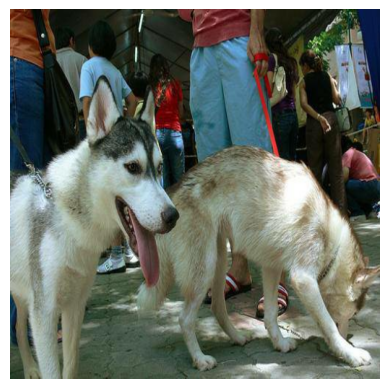

Actual value : siberian_husky
Predicted value : eskimo_dog


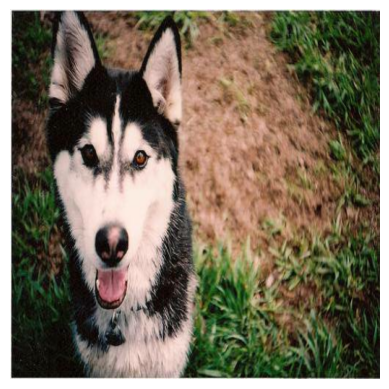

Actual value : eskimo_dog
Predicted value : siberian_husky


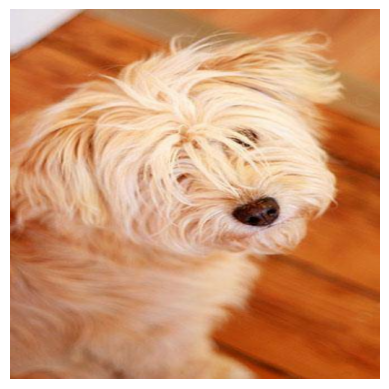

Actual value : soft-coated_wheaten_terrier
Predicted value : norfolk_terrier


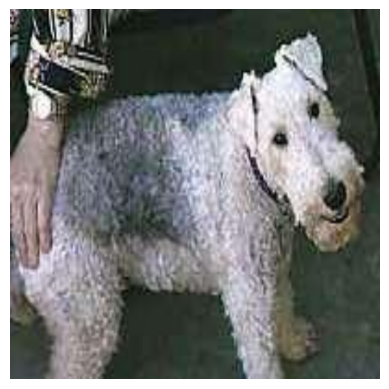

Actual value : lakeland_terrier
Predicted value : wire-haired_fox_terrier


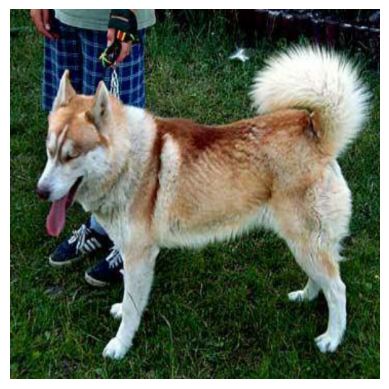

Actual value : siberian_husky
Predicted value : eskimo_dog


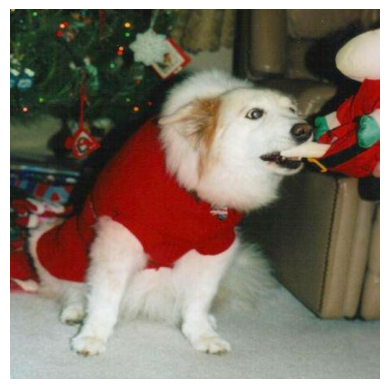

Actual value : collie
Predicted value : samoyed


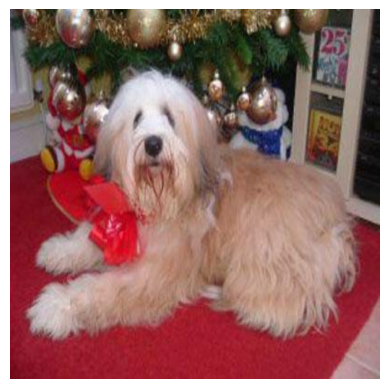

Actual value : tibetan_mastiff
Predicted value : tibetan_terrier


In [ ]:
viewIncorrect(val_features, val_labels, val_preds, 10)